
# Titanic_Kaggle_Survived

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')



In [2]:
import xgboost

In [3]:
df = pd.read_csv( "train.csv" )
df["Survived"].value_counts()
lb_make = LabelEncoder()
df["Embarked"] = lb_make.fit_transform(df["Embarked"].astype('str'))
y = df["Survived"]
X = df.drop(columns=["Survived","Name","Ticket","Cabin","Parch","SibSp","PassengerId"])
Sex_replace={'Sex':{'male':1,'female':2}}
X.replace(Sex_replace,inplace=True)
X.isna().sum().sum()
X = X.fillna(X.mean())
X.Fare = X.Fare.fillna(0).astype(int)
X.Age = X.Age.fillna(0).astype(int)
#X = pd.DataFrame(X)
X.to_csv("train_clean_data_FR.csv")
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,2
1,1,2,38,71,0
2,3,2,26,7,2
3,1,2,35,53,2
4,3,1,35,8,2


In [4]:
X.shape , y.shape

((891, 5), (891,))

In [5]:

#X.dropna(0)
#y.dropna(0)
y.to_csv("train_clean_labels.csv")
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,2
1,1,2,38,71,0
2,3,2,26,7,2
3,1,2,35,53,2
4,3,1,35,8,2


In [9]:

X.to_csv("train_clean_data_FR.csv")
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,2
1,1,2,38,71,0
2,3,2,26,7,2
3,1,2,35,53,2
4,3,1,35,8,2


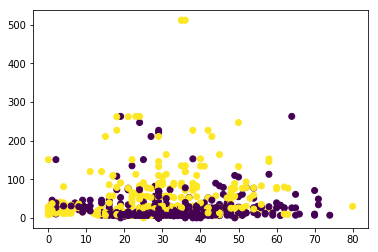

In [10]:
plt.scatter(X["Age"],X["Fare"] ,c=y)
plt.show()

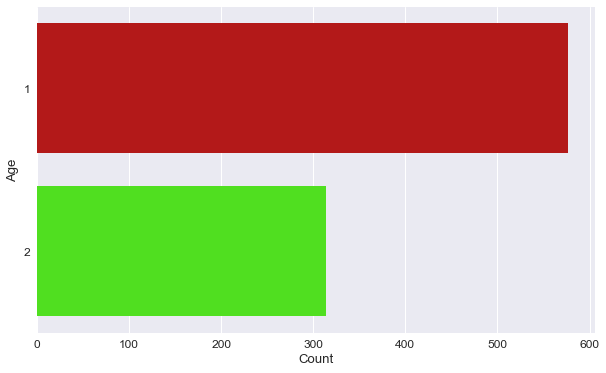

In [11]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='Sex', data=X,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("Age")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

Before using sophisticated models, let's see what results the worst classifier would give'

In [12]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20) 

In [13]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
419,3,2,10,24,2
38,3,2,18,18,2
48,3,1,29,21,0
145,2,1,19,36,2
792,3,2,29,69,2


In [14]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
# fit model no training data
score=[]
model_XGB = XGBClassifier()
model_XGB.fit(X_train, Y_train)
Y_Pred_XGB=model_XGB.predict(X_test)
print(accuracy_score(Y_test, Y_Pred_XGB))

0.7932960893854749


In [16]:
from sklearn import linear_model
clf_Lnr = linear_model.SGDClassifier()
clf_Lnr.fit(X_train, Y_train)
Y_Pred_Lnr=clf_Lnr.predict(X_test)
print(accuracy_score(Y_test, Y_Pred_Lnr))

0.3743016759776536


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
score=[]
for i in range(3,30,2):
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,Y_train)
    Y_Pred=knn.predict(X_test)
    score.append(accuracy_score(Y_Pred,Y_test))
    print(classification_report(Y_Pred,Y_test))

             precision    recall  f1-score   support

          0       0.80      0.64      0.71       127
          1       0.41      0.62      0.49        52

avg / total       0.69      0.63      0.65       179

             precision    recall  f1-score   support

          0       0.80      0.67      0.73       121
          1       0.49      0.66      0.56        58

avg / total       0.70      0.66      0.67       179

             precision    recall  f1-score   support

          0       0.83      0.68      0.75       123
          1       0.50      0.70      0.58        56

avg / total       0.73      0.69      0.70       179

             precision    recall  f1-score   support

          0       0.84      0.67      0.75       127
          1       0.46      0.69      0.55        52

avg / total       0.73      0.68      0.69       179

             precision    recall  f1-score   support

          0       0.85      0.68      0.76       126
          1       0.49      0.72 

In [18]:
score

[0.6312849162011173,
 0.664804469273743,
 0.6871508379888268,
 0.6759776536312849,
 0.6927374301675978,
 0.6815642458100558,
 0.664804469273743,
 0.664804469273743,
 0.664804469273743,
 0.6759776536312849,
 0.664804469273743,
 0.659217877094972,
 0.6480446927374302,
 0.6480446927374302]

In [19]:
#SVM
from sklearn import svm
SV = svm.SVC()
SV.fit(X_train, Y_train)  
y_pred = SV.predict(X_test)
print(accuracy_score(Y_test, y_pred))
#printScores(y_test, y_pred, "svm",average=None)

0.6424581005586593


In [20]:
#SVM rbf

from sklearn import svm
for  C in range(1,2):
    
    SVr = svm.SVC(kernel='rbf', C=0.01).fit(X_train, Y_train)
    y_pred = SVr.predict(X_test)
    print(accuracy_score(Y_test, y_pred))



0.5642458100558659


In [21]:

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(X_train,Y_train)
y_pred = pd.Series(LGR.predict(X_test))
print(accuracy_score(Y_test, y_pred))


0.7653631284916201


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[93  8]
 [29 49]]
             precision    recall  f1-score   support

          0       0.76      0.92      0.83       101
          1       0.86      0.63      0.73        78

avg / total       0.80      0.79      0.79       179

0.7932960893854749


In [24]:
#for trial in range(20):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
clf = MLPClassifier(activation='relu', alpha=1e-05, batch_size=2, beta_1=0.9,
   beta_2=0.999, early_stopping=True, epsilon=1e-05,
   hidden_layer_sizes=(11,15,6), learning_rate='adaptive',
   learning_rate_init=0.001, max_iter=900, momentum=0.9,
   nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
   solver='adam', tol=0.0005, validation_fraction=0.1, verbose=False,
   warm_start=False)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
#print(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7653631284916201


In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    #print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_train)))
    #print()

Learning rate:  0.05
Accuracy score (training): 0.629
Learning rate:  0.1
Accuracy score (training): 0.635
Learning rate:  0.25
Accuracy score (training): 0.650
Learning rate:  0.5
Accuracy score (training): 0.670
Learning rate:  0.75
Accuracy score (training): 0.666
Learning rate:  1
Accuracy score (training): 0.678


In [41]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
#y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
#y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(X_train,Y_train)

# Score the results
score = results_rf.score(X_train,Y_train)
print ("Mean accuracy of Random Forest Predictions on the data was: {0}".format(score))

Mean accuracy of Random Forest Predictions on the data was: 0.898876404494382


In [29]:
y_pred_knn = knn.predict(X_test)
y_pred_SVM =  SV.predict(X_test)
y_pred_SVr = SVr.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_MLPB = MLPB.predict(X_test_std)
y_pred_LGR = pd.Series(LGR.predict(X_test))
y_pred_gg = gb.predict(X_test)
Y_Pred_XGB=model_XGB.predict(X_test)

knn_acc=round(accuracy_score(Y_test, y_pred_knn),5)
LGR_acc=round(accuracy_score(Y_test, y_pred_LGR),5)
mlp_acc=round(accuracy_score(Y_test, y_pred_mlp),5)

SVM_acc=round(accuracy_score(Y_test, y_pred_SVM),5)
SVr_acc=round(accuracy_score(Y_test, y_pred_SVr),5)
MLPB_acc=round(accuracy_score(Y_test, y_pred_MLPB),5)
GB_acc=round(accuracy_score(Y_test, y_pred_gg),5)



print("Acc_knn:",knn_acc)
print("Acc_LGR:",LGR_acc)
print("Acc_mlp:",mlp_acc)
print("Acc_SVM:",SVM_acc)
print("Acc_SVr",SVr_acc)
print("Acc_MLPB",MLPB_acc)
print("Acc_GB",GB_acc)

print("ACC_XGB:",accuracy_score(Y_test, Y_Pred))

Acc_knn: 0.55866
Acc_LGR: 0.50838
Acc_mlp: 0.56983
Acc_SVM: 0.52514
Acc_SVr 0.56425
Acc_MLPB 0.49721
Acc_GB 0.52514
ACC_XGB: 0.6480446927374302


# Kaggle Titanic test data validation

In [46]:
df = pd.read_csv( "test.csv" )
#df["Survived"].value_counts()
lb_make = LabelEncoder()
df["Embarked"] = lb_make.fit_transform(df["Embarked"].astype('str'))
#y = df["Survived"]
X = df.drop(columns=["Name","Ticket","Cabin","Parch","SibSp","PassengerId"])
Sex_replace={'Sex':{'male':1,'female':2}}
X.replace(Sex_replace,inplace=True)
X.isna().sum().sum()
X = X.fillna(X.mean())
X.Fare = X.Fare.fillna(0).astype(int)
X.Age = X.Age.fillna(0).astype(int)
#X = pd.DataFrame(X)
X.to_csv("train_clean_data_FR.csv")
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34,7,1
1,3,2,47,7,2
2,2,1,62,9,1
3,3,1,27,8,2
4,3,2,22,12,2


In [49]:
test=X

In [50]:
test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34,7,1
1,3,2,47,7,2
2,2,1,62,9,1
3,3,1,27,8,2
4,3,2,22,12,2


In [51]:
test.shape

(418, 5)

In [54]:
Pd=XT["PassengerId"]

In [59]:
#model_XGB.fit(X_train, Y_train)
Y_Pred_XGB=model_XGB.predict(test)
Y_Pred_Lnr = mlp.predict(test)

In [60]:
import pandas as pd
res = {'S.No':'Survived'}
res1 = {'S.No1':'PassengerId'}
for i in range(len(Y_Pred_XGB)):
                  
    res[i+1] = Y_Pred_XGB[i]
    res1[i+1] = Pd[i]
    
    
res_np = np.array(list(res.items()))
res_np1 = np.array(list(res1.items()))
df = pd.DataFrame(res_np)
df1 = pd.DataFrame(res_np1)

DM=pd.concat([df1, df], axis=1)
DM.to_csv("submission7.csv",index=False, header = False)


In [61]:
df = pd.read_csv( "submission7.csv" )
print(df["Survived"].value_counts())

0    286
1    132
Name: Survived, dtype: int64


In [62]:
dff = df.drop(columns=["S.No","S.No1"])

In [63]:
dff.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [64]:
dff.to_csv("submission7.csv",index=False)

# Your submission scored 0.77033, which is an improvement of your previous score of 0.76555. Great job!
